In [50]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

In [42]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

@staticmethod
def size_ddf(ddf):
    print(ddf.shape[0].compute())

def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed'),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend'),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal'),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual'),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
    )

In [20]:
ddf = dd.read_parquet("../processed/ASIANPAINT-*.parquet")

In [22]:
df = ddf.compute()

In [25]:
close_1_day = df['2020-01-01':'2020-01-02'].close

In [26]:
close_1_day

date
2020-01-01 09:15:00+05:30    1792.900024
2020-01-01 09:16:00+05:30    1793.300049
2020-01-01 09:17:00+05:30    1795.849976
2020-01-01 09:18:00+05:30    1793.500000
2020-01-01 09:19:00+05:30    1794.000000
                                ...     
2020-01-01 15:25:00+05:30    1790.199951
2020-01-01 15:26:00+05:30    1790.000000
2020-01-01 15:27:00+05:30    1789.449951
2020-01-01 15:28:00+05:30    1789.750000
2020-01-01 15:29:00+05:30    1784.900024
Name: close, Length: 375, dtype: float32

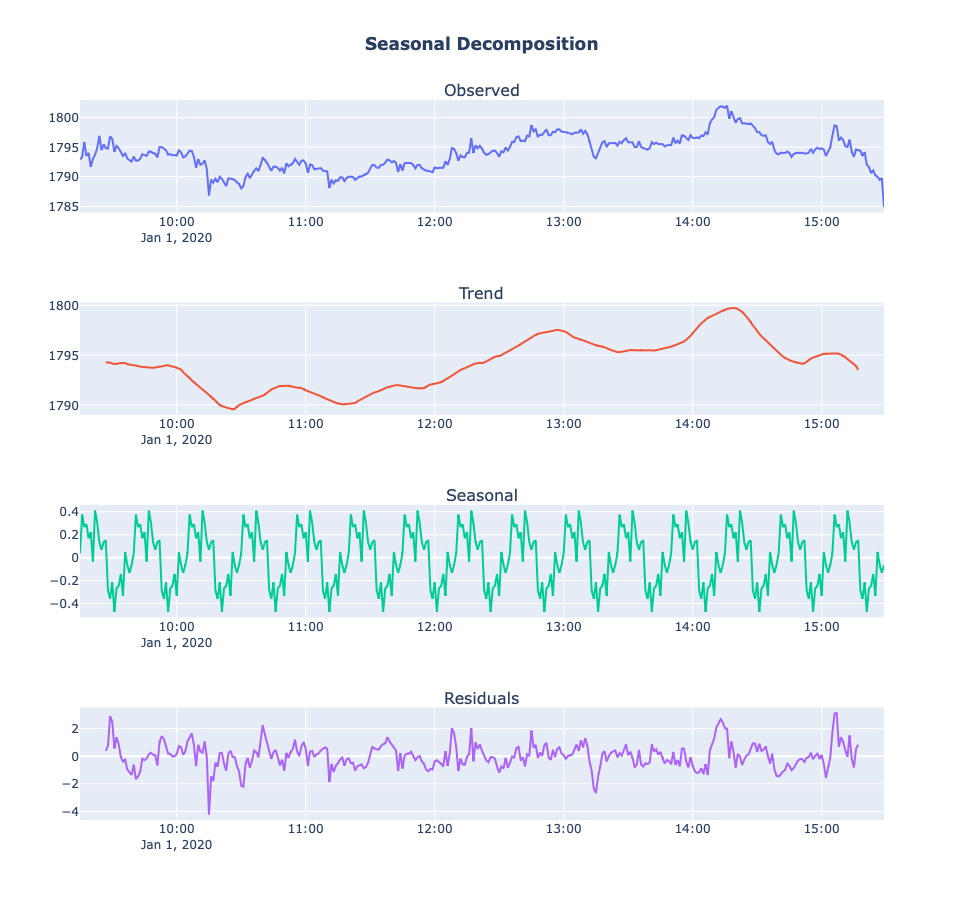

In [41]:
decomposition = seasonal_decompose(close_1_day, period=25)
fig = plot_seasonal_decompose(decomposition,dates=list(close_1_day.index))
fig.show()

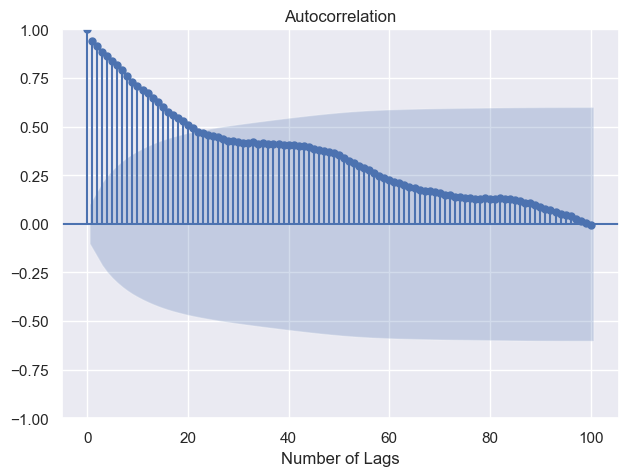

In [54]:
sm.graphics.tsa.plot_acf(close_1_day,lags=100)
plt.xlabel('Number of Lags')
plt.show()